In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)


list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,-22.000000
1,1,0.5v,-22.000000
2,2,0.5v,-22.000000
3,3,0.5v,-22.000000
4,4,0.5v,-22.000000
...,...,...,...
8995,995,24.5v,1.959184
8996,996,24.5v,1.959184
8997,997,24.5v,1.959184
8998,998,24.5v,1.959184


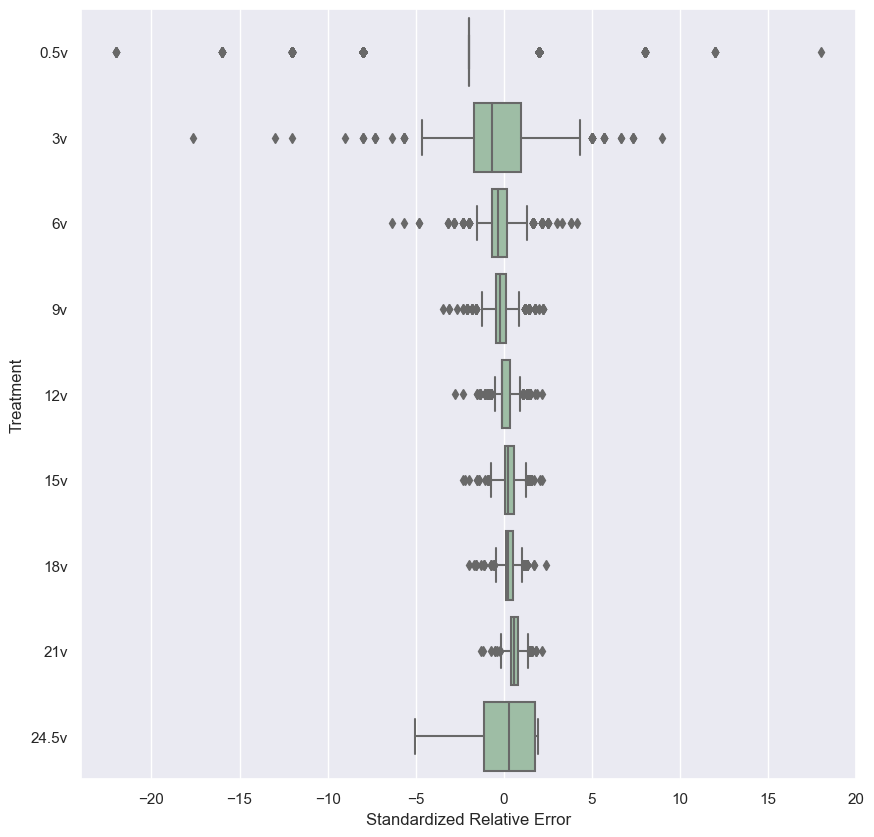

In [15]:
for i in df.columns:
    df_remove = df.drop(df[
        (df[i] > df[i].mean() + df[i].std()) | 
        (df[i] < df[i].mean() - df[i].std())
    ].index)

df_remove = df_remove.reset_index(drop=True)
df_remove

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-8.0,-1.666667,-0.666667,-0.444444,-0.083333,0.066667,0.111111,0.333333,-1.265306
1,-8.0,-1.666667,-0.666667,-0.444444,-0.083333,0.066667,0.111111,0.333333,-1.265306
2,-8.0,-1.666667,-0.666667,-0.444444,-0.083333,0.066667,0.111111,0.333333,-1.265306
3,-8.0,-1.666667,-0.666667,-0.444444,-0.083333,0.066667,0.111111,0.333333,-1.265306
4,-8.0,-1.666667,-0.666667,-0.444444,-0.083333,0.066667,0.111111,0.333333,-1.265306
...,...,...,...,...,...,...,...,...,...
517,2.0,1.000000,0.166667,0.111111,0.333333,0.600000,0.388889,0.666667,1.632653
518,2.0,1.000000,0.166667,0.111111,0.333333,0.600000,0.388889,0.666667,1.632653
519,2.0,1.000000,0.166667,0.111111,0.333333,0.600000,0.388889,0.666667,1.632653
520,2.0,1.000000,0.166667,0.111111,0.333333,0.600000,0.388889,0.666667,1.632653


In [22]:

list_voltage = []
for i in df_remove.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df_remove.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

,index,voltage,value
0,0,0.5v,-8.000000
1,1,0.5v,-8.000000
2,2,0.5v,-8.000000
3,3,0.5v,-8.000000
4,4,0.5v,-8.000000
...,...,...,...
4693,517,24.5v,1.632653
4694,518,24.5v,1.632653
4695,519,24.5v,1.632653
4696,520,24.5v,1.632653


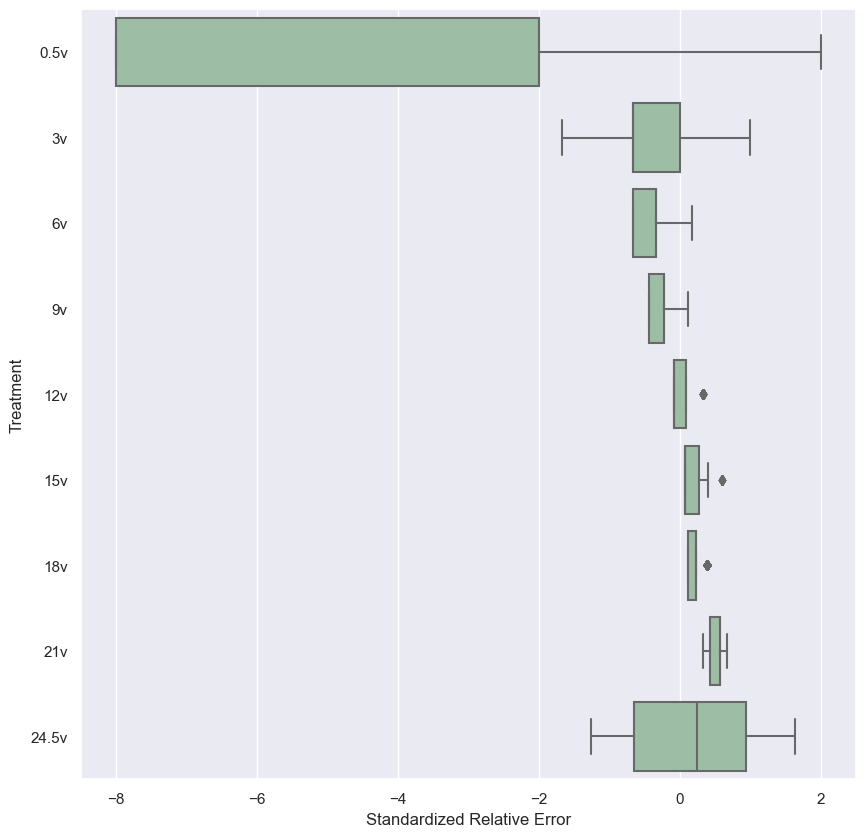

In [29]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier STD Based from each variation sample.png')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

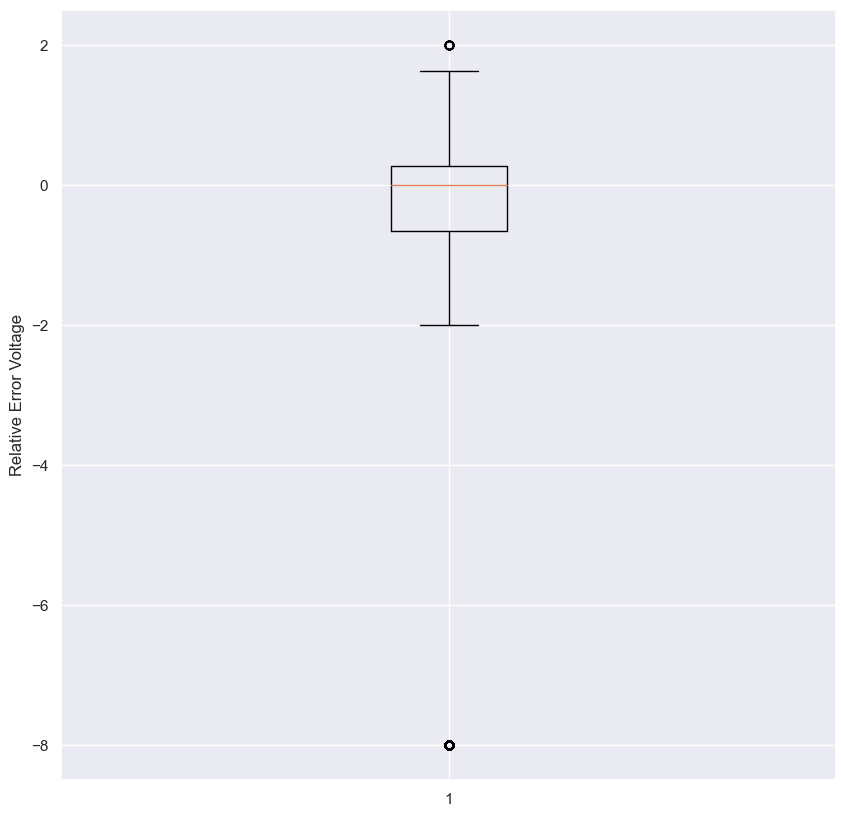

In [27]:
plt.boxplot(df_melt['value'])
plt.ylabel('Relative Error Voltage')

In [28]:
df_melt.to_csv('../docs 2nd Approach/remove_outlier_each_std.csv', index=False)